In [1]:
from sklearn.datasets import fetch_openml
import pandas
import numpy
from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

Gör om labels till lika många klasser som antal noder i output layer

In [3]:
y = to_categorical(y, num_classes=10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
unique, counts = numpy.unique(y, return_counts=True)
unique, counts

(array([0., 1.], dtype=float32), array([630000,  70000], dtype=int64))

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(56000, 784) (14000, 784)
(56000, 10) (14000, 10)


In [7]:
n_cols = X.shape[1]
n_cols

784

In [8]:
model = Sequential()

model.add(Dense(500, activation='relu', input_shape=(784,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

early_stop = EarlyStopping(patience=4)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=30, callbacks=[early_stop], validation_split=0.2)

Epoch 1/30
1400/1400 [==============================] - 6s 4ms/step - loss: 1.7525 - accuracy: 0.8996 - val_loss: 0.3326 - val_accuracy: 0.9319
Epoch 2/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2140 - accuracy: 0.9482 - val_loss: 0.2434 - val_accuracy: 0.9365
Epoch 3/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1747 - accuracy: 0.9537 - val_loss: 0.2254 - val_accuracy: 0.9487
Epoch 4/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1671 - accuracy: 0.9567 - val_loss: 0.2234 - val_accuracy: 0.9441
Epoch 5/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1458 - accuracy: 0.9608 - val_loss: 0.1827 - val_accuracy: 0.9554
Epoch 6/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1347 - accuracy: 0.9643 - val_loss: 0.1943 - val_accuracy: 0.9512
Epoch 7/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1168 - accuracy: 0.9687 - val_loss: 0.1776 - val_accuracy:

In [11]:
y_pred = model.predict(X_test)

438/438 [==============================] - 1s 1ms/step


In [12]:
y_pred = numpy.argmax(y_pred, axis=1)
y_pred[:5]

array([6, 7, 3, 5, 4], dtype=int64)

In [13]:
y_test = numpy.argmax(y_test, axis=1)
y_test[:5]

array([6, 7, 3, 5, 4], dtype=int64)

In [14]:
acc = accuracy_score(y_test, y_pred)

In [15]:
acc

0.9607857142857142

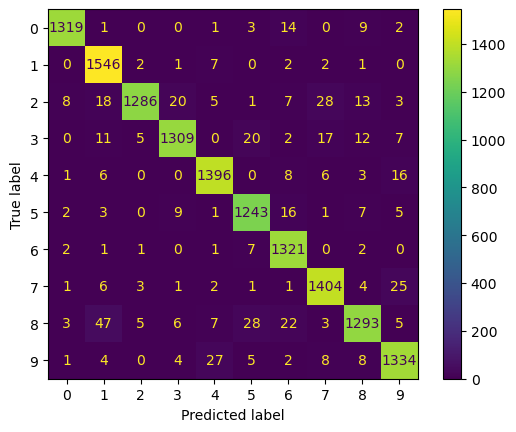

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_pred=y_pred, y_true=y_test)).plot()